In [1]:
## ANN

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# importing the liberary which is responsible for creating ANN

import keras
from keras.models import Sequential # It is responsible for creating ANN, CNN 
from keras.layers import Dense # Hidden layer
from keras.layers import LeakyReLU, PReLU, ELU # activation function
from keras.layers import Dropout # It is regularization paramenter


In [3]:
# Reading the data
df = pd.read_csv('Churn_Modelling.csv')
print(df)


      RowNumber  CustomerId    Surname  ...  IsActiveMember EstimatedSalary Exited
0             1    15634602   Hargrave  ...               1       101348.88      1
1             2    15647311       Hill  ...               1       112542.58      0
2             3    15619304       Onio  ...               0       113931.57      1
3             4    15701354       Boni  ...               0        93826.63      0
4             5    15737888   Mitchell  ...               1        79084.10      0
...         ...         ...        ...  ...             ...             ...    ...
9995       9996    15606229   Obijiaku  ...               0        96270.64      0
9996       9997    15569892  Johnstone  ...               1       101699.77      0
9997       9998    15584532        Liu  ...               1        42085.58      1
9998       9999    15682355  Sabbatini  ...               0        92888.52      1
9999      10000    15628319     Walker  ...               0        38190.78      0

[10

In [4]:
# Data seperation 
x = df.iloc[:, 3:13]
print('The x data is \n', x.head())

y = df.iloc[:, 13]
print('The y data is \n', y.head())


The x data is 
    CreditScore Geography  Gender  ...  HasCrCard  IsActiveMember  EstimatedSalary
0          619    France  Female  ...          1               1        101348.88
1          608     Spain  Female  ...          0               1        112542.58
2          502    France  Female  ...          1               0        113931.57
3          699    France  Female  ...          0               0         93826.63
4          850     Spain  Female  ...          1               1         79084.10

[5 rows x 10 columns]
The y data is 
 0    1
1    0
2    1
3    0
4    0
Name: Exited, dtype: int64


In [5]:
# checking the null values 

print('The null value for x column is \n', x.isnull().sum())
print('The null value for y column is \n', y.isnull().sum())

# checking the columns name 
print(x.columns)


The null value for x column is 
 CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
dtype: int64
The null value for y column is 
 0
Index(['CreditScore', 'Geography', 'Gender', 'Age', 'Tenure', 'Balance',
       'NumOfProducts', 'HasCrCard', 'IsActiveMember', 'EstimatedSalary'],
      dtype='object')


In [6]:
# creating a dummy variables for categorical variable 
geography = pd.get_dummies(x['Geography'], drop_first = True)
print(geography)
gender = pd.get_dummies(x['Gender'], drop_first = True)
print(gender)


      Germany  Spain
0           0      0
1           0      1
2           0      0
3           0      0
4           0      1
...       ...    ...
9995        0      0
9996        0      0
9997        0      0
9998        1      0
9999        0      0

[10000 rows x 2 columns]
      Male
0        0
1        0
2        0
3        0
4        0
...    ...
9995     1
9996     1
9997     0
9998     1
9999     0

[10000 rows x 1 columns]


In [7]:
# Concatenate the data frame
x = pd.concat([x, geography, gender], axis = 1)
print("The x data is \n",x)


The x data is 
       CreditScore Geography  Gender  Age  ...  EstimatedSalary  Germany  Spain  Male
0             619    France  Female   42  ...        101348.88        0      0     0
1             608     Spain  Female   41  ...        112542.58        0      1     0
2             502    France  Female   42  ...        113931.57        0      0     0
3             699    France  Female   39  ...         93826.63        0      0     0
4             850     Spain  Female   43  ...         79084.10        0      1     0
...           ...       ...     ...  ...  ...              ...      ...    ...   ...
9995          771    France    Male   39  ...         96270.64        0      0     1
9996          516    France    Male   35  ...        101699.77        0      0     1
9997          709    France  Female   36  ...         42085.58        0      0     0
9998          772   Germany    Male   42  ...         92888.52        1      0     1
9999          792    France  Female   28  ...    

In [8]:
# Droping the column 
x = x.drop(['Geography', 'Gender'], axis = 1)
print("The x final data is \n",x)


The x final data is 
       CreditScore  Age  Tenure  ...  Germany  Spain  Male
0             619   42       2  ...        0      0     0
1             608   41       1  ...        0      1     0
2             502   42       8  ...        0      0     0
3             699   39       1  ...        0      0     0
4             850   43       2  ...        0      1     0
...           ...  ...     ...  ...      ...    ...   ...
9995          771   39       5  ...        0      0     1
9996          516   35      10  ...        0      0     1
9997          709   36       7  ...        0      0     0
9998          772   42       3  ...        1      0     1
9999          792   28       4  ...        0      0     0

[10000 rows x 11 columns]


In [9]:
# splitting the data set
x_train, x_test , y_train, y_test = train_test_split(x,y , test_size=0.2, random_state=0)


In [10]:
# scaling the x_train, x_test
scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.fit_transform(x_test)


In [25]:
# Initialization Sequential liberary
classifier = Sequential() # this will be an empty neural network currently 

# Adding the first input layer and the first hidden layer 
classifier.add(Dense(units = 6, kernel_initializer='he_normal', activation='relu', input_shape=(11,)))
classifier.add(Dropout(0.3))

# Adding the second hidden layer
classifier.add(Dense(units = 6, kernel_initializer='he_normal', activation='relu'))
classifier.add(Dropout(0.4))

# adding the third layer
classifier.add(Dense(units = 6, kernel_initializer='he_normal', activation='relu'))
classifier.add(Dropout(0.2))


# Adding the output layer
classifier.add(Dense(units = 1, kernel_initializer='glorot_uniform', activation='sigmoid'))




In [26]:
classifier.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_10 (Dense)            (None, 6)                 72        
                                                                 
 dropout (Dropout)           (None, 6)                 0         
                                                                 
 dense_11 (Dense)            (None, 6)                 42        
                                                                 
 dropout_1 (Dropout)         (None, 6)                 0         
                                                                 
 dense_12 (Dense)            (None, 6)                 42        
                                                                 
 dropout_2 (Dropout)         (None, 6)                 0         
                                                                 
 dense_13 (Dense)            (None, 1)                

In [27]:
# compiling the ANN
classifier.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])


In [28]:
# Fitting the ANN to the training set
model_history = classifier.fit(x_train,y_train, validation_split=0.33, batch_size=10, epochs=100)


Epoch 1/100
536/536 [==============================] - 4s 6ms/step - loss: 0.6410 - accuracy: 0.7638 - val_loss: 0.4984 - val_accuracy: 0.8023
Epoch 2/100
536/536 [==============================] - 3s 5ms/step - loss: 0.5264 - accuracy: 0.7953 - val_loss: 0.4924 - val_accuracy: 0.7955
Epoch 3/100
536/536 [==============================] - 3s 5ms/step - loss: 0.5038 - accuracy: 0.7972 - val_loss: 0.4833 - val_accuracy: 0.7955
Epoch 4/100
536/536 [==============================] - 3s 5ms/step - loss: 0.4953 - accuracy: 0.7966 - val_loss: 0.4758 - val_accuracy: 0.7955
Epoch 5/100
536/536 [==============================] - 3s 5ms/step - loss: 0.4862 - accuracy: 0.7998 - val_loss: 0.4662 - val_accuracy: 0.7955
Epoch 6/100
536/536 [==============================] - 3s 5ms/step - loss: 0.4803 - accuracy: 0.8054 - val_loss: 0.4627 - val_accuracy: 0.7955
Epoch 7/100
536/536 [==============================] - 3s 5ms/step - loss: 0.4766 - accuracy: 0.8048 - val_loss: 0.4532 - val_accuracy: 0.7959

In [29]:
# list all the data in history
print(model_history.history.keys())

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


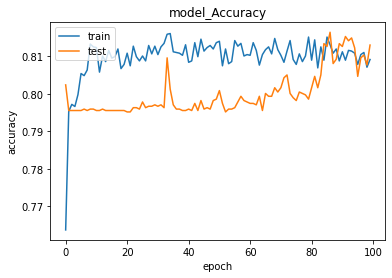

In [30]:
# Summarize the history for accuracy
plt.plot(model_history.history['accuracy'])
plt.plot(model_history.history['val_accuracy'])
plt.title('model_Accuracy')
plt.xlabel('epoch')
plt.ylabel('accuracy')
plt.legend(['train', 'test'],loc = 'upper left')
plt.show()


In [31]:

# Making prediction and evaluating the model
y_pred = classifier.predict(x_test)
y_pred = (y_pred > 0.5)
print(y_pred)

[[False]
 [False]
 [False]
 ...
 [False]
 [False]
 [False]]


In [32]:
# Making the confusion metrics
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
print(cm)

[[1588    7]
 [ 368   37]]


In [33]:
# Calculate the accuracy
from sklearn.metrics import accuracy_score
score = accuracy_score(y_test, y_pred)
print(score)

0.8125
